### Importing required libraries

In [570]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing Dataset

In [571]:
data = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

## Exploratory Data Analysis

In [572]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [573]:
data.shape

(768, 9)

In [574]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [575]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [576]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [577]:
# unique values in each feature
for i in data.columns:
    print(i.ljust(25) , ' : ' ,data[i].nunique())

Pregnancies                :  17
Glucose                    :  136
BloodPressure              :  47
SkinThickness              :  51
Insulin                    :  186
BMI                        :  248
DiabetesPedigreeFunction   :  517
Age                        :  52
Outcome                    :  2


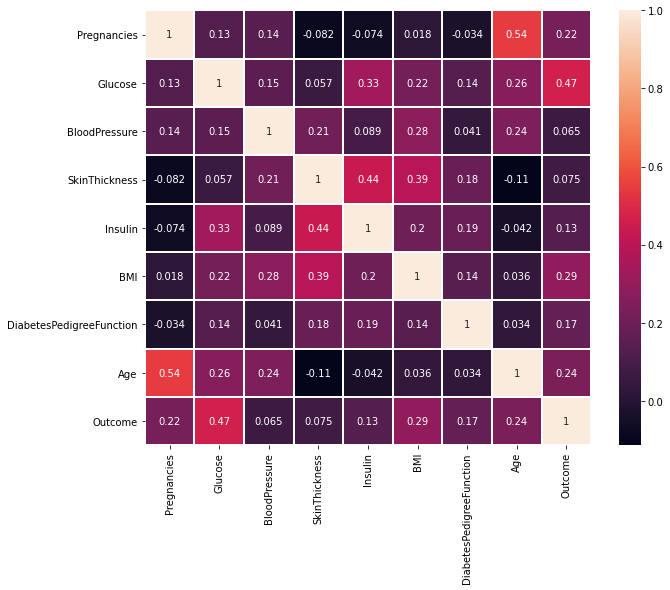

In [578]:
# correlation between each feature
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, linewidths=2)
plt.show()

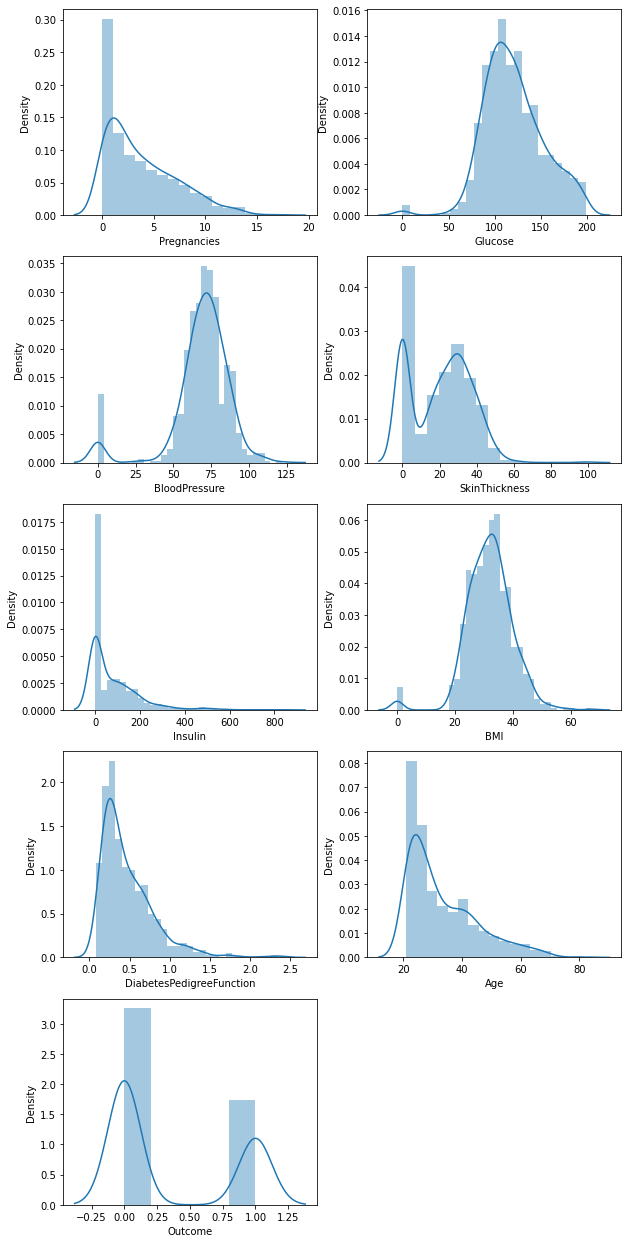

In [579]:
# visualizing the data through distribution plot
a = 5
b= 2
c = 1
plt.figure(figsize = (10,22))
for i in data.columns:
    plt.subplot(a,b,c)
    sns.distplot(data[i])
    c += 1
plt.show()

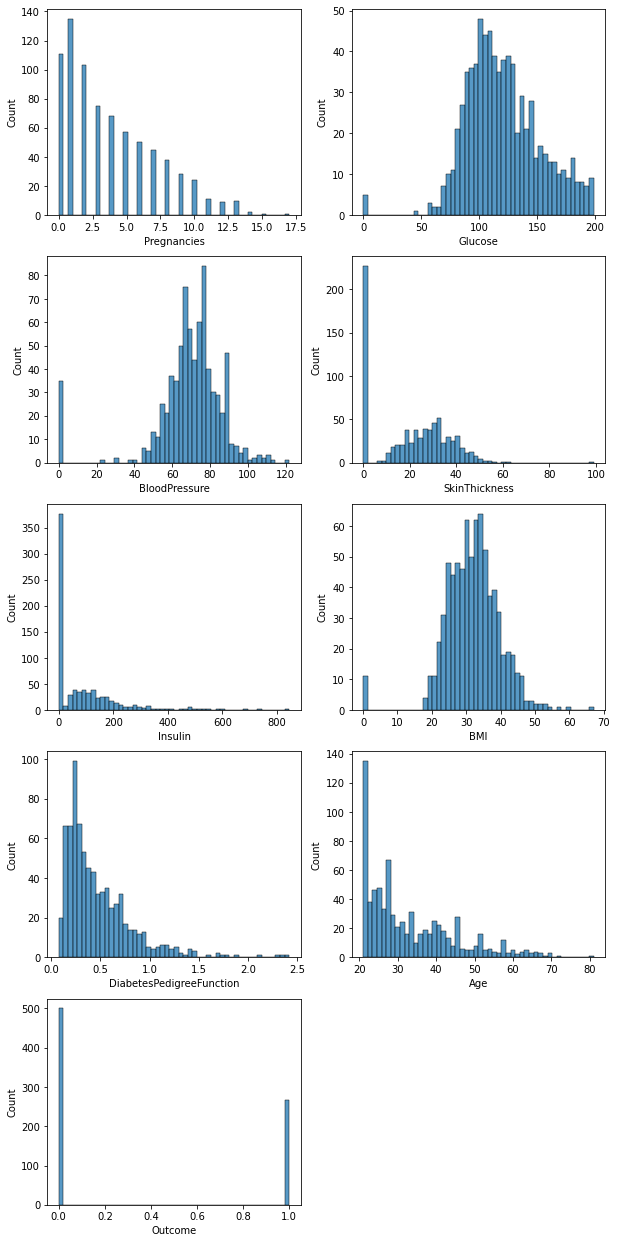

In [580]:
# visualizing the data through histplot 
a = 5
b= 2
c = 1
plt.figure(figsize = (10,22))
for i in data.columns:
    plt.subplot(a,b,c)
    sns.histplot(data[i],bins=50)
    c += 1
plt.show()

#### Note : As we can see there is no null value in the dataset but actually the null values are present in dataset in form of 0. It's impossible to have Glucose, BloodPressure, SkinThickness, Insulin, BMI to be zero. 

## Replacing 0 with np.nan

In [581]:
for col in data.iloc[:,1:6]:
    data[col].replace(0,np.nan,inplace=True)
    
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
5,5,116.0,74.0,NaN,NaN,25.6,0.201,30,0
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
7,10,115.0,NaN,NaN,NaN,35.3,0.134,29,0
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
9,8,125.0,96.0,NaN,NaN,NaN,0.232,54,1


#### Visualizing the amount of null values

<AxesSubplot:>

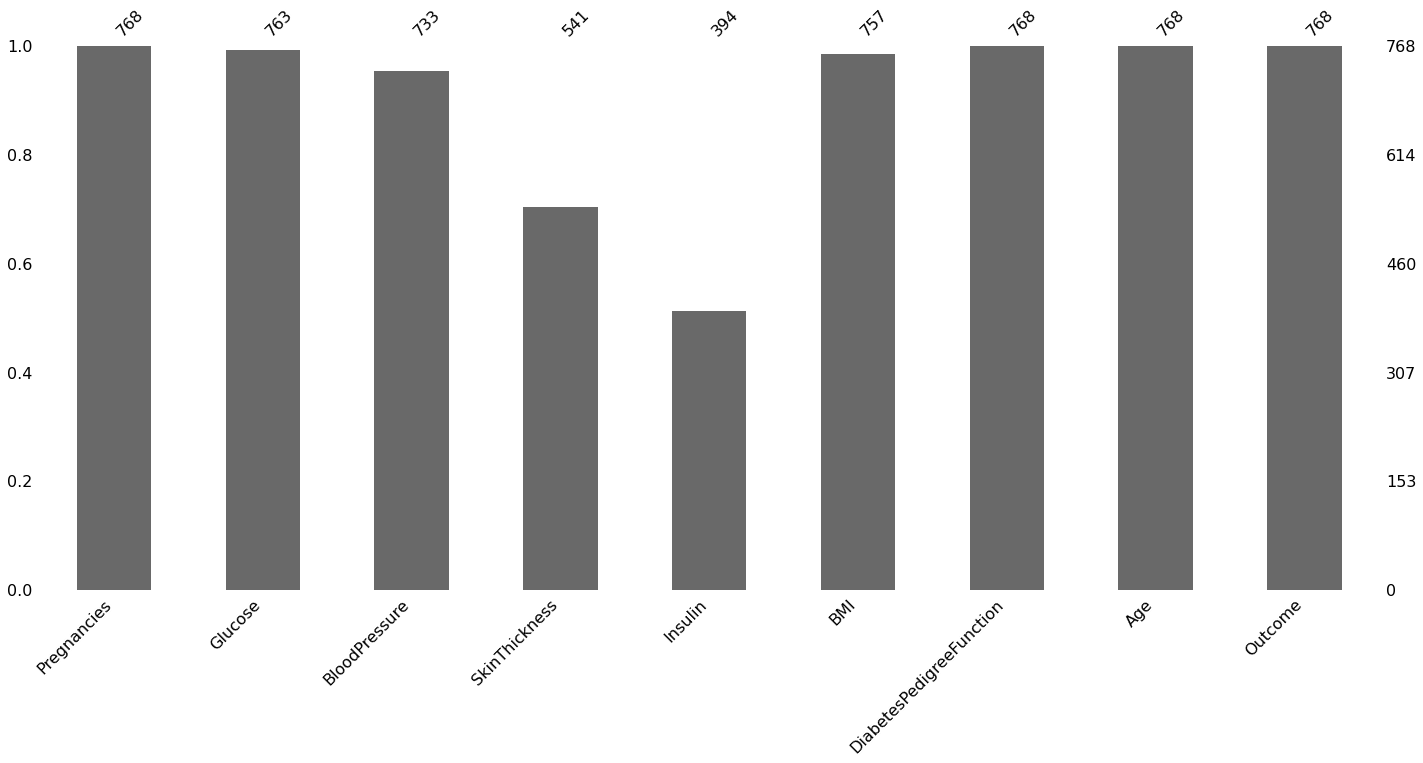

In [582]:
import missingno as msno
msno.bar(data)

### Data Preprocessing

1. Separating the independent and dependent features
2. Splitting the data into train-test
3. Handling Missing Values
4. Feature Scaling
5. Feature Selection
6. Outlier Analysis

#### Separating the Independent and Dependent Feature

In [583]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [584]:
X.shape

(768, 8)

#### Train-Test Split

In [585]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2, random_state=42)

In [586]:
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(614, 8)
(614,)
(154, 8)
(154,)


In [587]:
Xtrain

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,NaN,NaN,NaN,NaN,0.304,21
618,9,112.0,82.0,24.0,NaN,28.2,1.282,50
346,1,139.0,46.0,19.0,83.0,28.7,0.654,22
294,0,161.0,50.0,NaN,NaN,21.9,0.254,65
231,6,134.0,80.0,37.0,370.0,46.2,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.0,35.0,140.0,28.6,0.411,26
106,1,96.0,122.0,NaN,NaN,22.4,0.207,27
270,10,101.0,86.0,37.0,NaN,45.6,1.136,38
435,0,141.0,NaN,NaN,NaN,42.4,0.205,29


#### Total Null values in data

In [588]:
data.isnull().sum().sort_values(ascending=False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Pregnancies                   0
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

#### Replacing the null values of below columns with mean as it has less amount of null values

In [589]:
for col in ['BloodPressure','BMI','Glucose']:
    mean_val = Xtrain[col].mean()
    Xtrain[col] = Xtrain[col].fillna(mean_val)
    Xtest[col] = Xtest[col].fillna(mean_val)

#### Replacing the null values of below columns with random sample imputation as it has large amount of null values

In [590]:
for col in ['Insulin','SkinThickness']:
    train_sample = Xtrain[col].dropna().sample(Xtrain[col].isnull().sum(),random_state = 42)
    # pandas need to have same index on order to merge the dataset
    train_sample.index = Xtrain[Xtrain[col].isnull()].index
    
    test_sample = Xtrain[col].dropna().sample(Xtest[col].isnull().sum(),random_state = 42)
    test_sample.index = Xtest[Xtest[col].isnull()].index
    
    Xtrain.loc[Xtrain[col].isnull(),col] = train_sample
    Xtest.loc[Xtest[col].isnull(),col] = test_sample

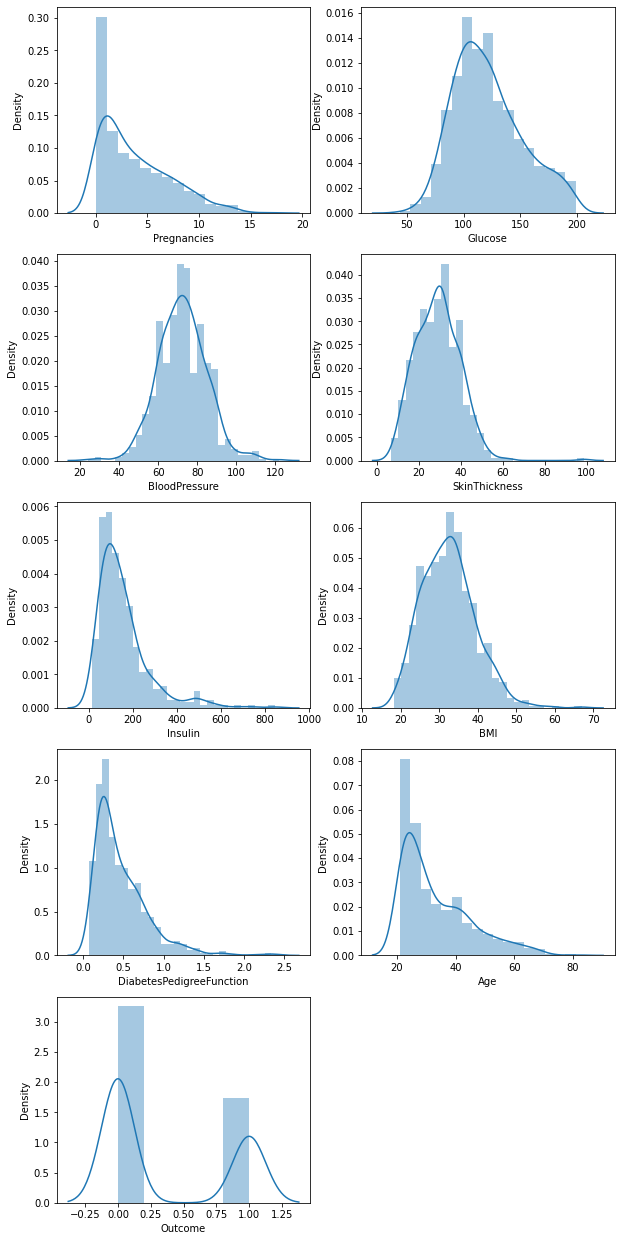

In [591]:
# data after imputation
a = 5
b= 2
c = 1
plt.figure(figsize = (10,22))
for i in data.columns:
    plt.subplot(a,b,c)
    sns.distplot(data[i])
    c += 1
plt.show()

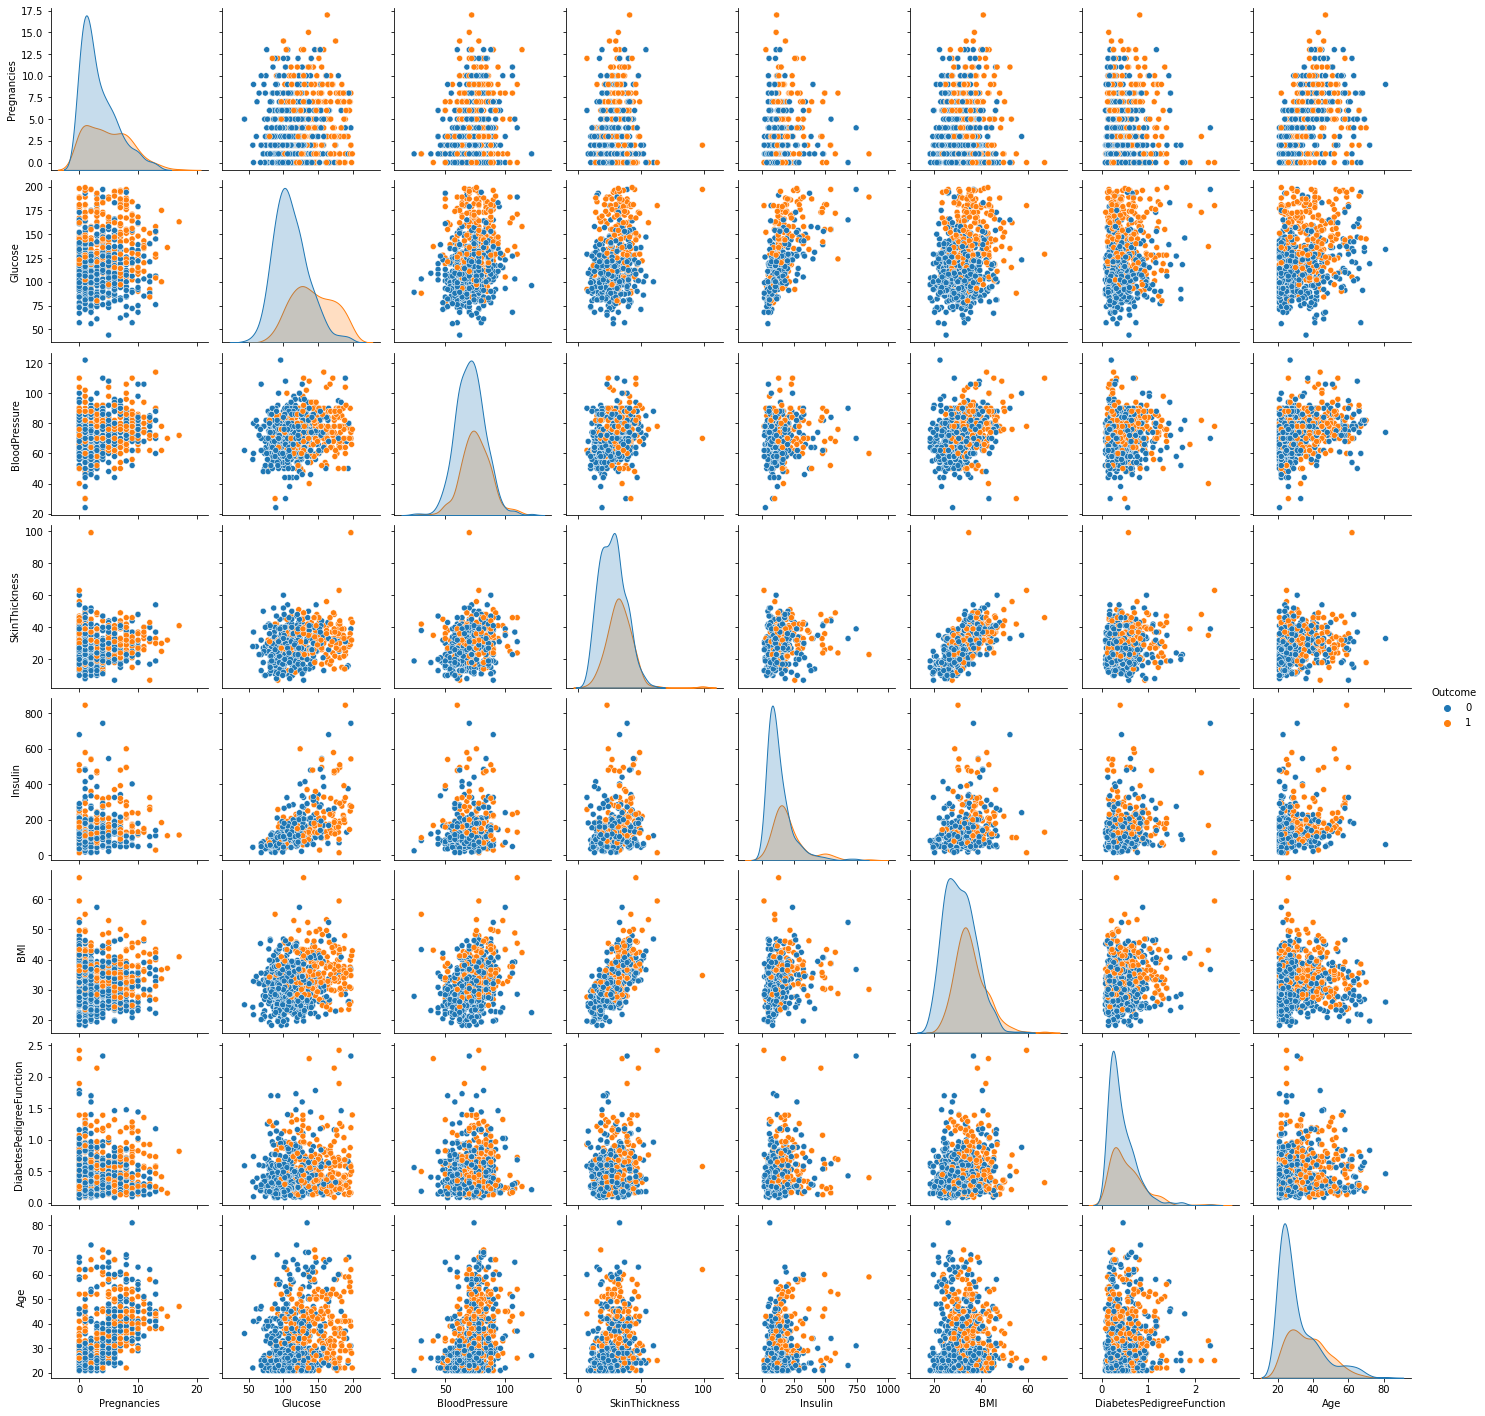

In [592]:
sns.pairplot(data, hue="Outcome")

#### Feature Scaling

In [593]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns = Xtrain.columns)
Xtest = pd.DataFrame(scaler.transform(Xtest), columns = Xtest.columns)

In [594]:
Xtrain.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,-0.526397,-1.258326,0.000000,-0.453880,-0.488715,-2.050668e-15,-0.490735,-1.035940
1,1.588046,-0.327397,0.807407,-0.453880,0.004947,-5.991781e-01,2.415030,1.487101
2,-0.828460,0.570284,-2.170424,-0.961498,-0.597488,-5.270266e-01,0.549161,-0.948939
3,-1.130523,1.301728,-1.839554,1.068974,-0.329739,-1.508286e+00,-0.639291,2.792122
4,0.681856,0.404047,0.641972,0.865927,1.803883,1.998274e+00,-0.686829,1.139095


In [595]:
Xtest.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.681856,-0.792861,-1.177814,0.459832,0.297797,0.237779,-0.116372,0.878091
1,-0.526397,-0.327397,0.228385,0.358309,-0.488715,0.483094,-0.954231,-1.035940
2,-0.526397,-0.460387,-0.681509,-0.453880,0.004947,-0.223990,-0.924520,-1.035940
3,1.285983,-0.493634,0.641972,1.068974,-0.329739,-1.118669,1.149329,0.095078
4,0.983919,0.470541,1.469148,0.053738,-0.538918,-0.353863,-0.770021,1.487101


In [596]:
Xtrain.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02,6.140000e+02
mean,7.666687e-17,-1.197242e-16,4.744666e-16,-1.296466e-16,6.943414e-17,2.741202e-16,1.564076e-16,-3.435544e-17
std,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00,1.000815e+00
min,-1.130523e+00,-2.588223e+00,-3.990211e+00,-2.078257e+00,-1.174821e+00,-2.042207e+00,-1.162210e+00,-1.035940e+00
25%,-8.284601e-01,-7.263666e-01,-6.815085e-01,-8.345931e-01,-6.455988e-01,-7.254431e-01,-6.764304e-01,-7.749361e-01
50%,-2.243336e-01,-1.279126e-01,-1.976809e-02,5.373804e-02,-2.879033e-01,-5.082696e-02,-2.872124e-01,-3.399290e-01
75%,6.818561e-01,5.702837e-01,6.419723e-01,7.644030e-01,2.475939e-01,5.804983e-01,4.295726e-01,6.170866e-01
max,4.004552e+00,2.565130e+00,4.116110e+00,3.505539e+00,5.786643e+00,5.014206e+00,5.796175e+00,4.184145e+00


#### Feature Selection

In [597]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

ordered_rank_features = SelectKBest(k=8)
ordered_feature = ordered_rank_features.fit(Xtrain,ytrain)

In [598]:
ordered_feature.scores_
dfscores = pd.DataFrame(ordered_feature.scores_, columns=['Scores'])
dfcolumns = pd.DataFrame(Xtrain.columns)
dfscores.sort_values(by = 'Scores',ascending=False)

,Scores
1,192.422837
5,69.371741
7,52.326951
0,27.550001
3,20.052310
4,17.817643
2,16.030957
6,14.977704


#### Outlier Analysis

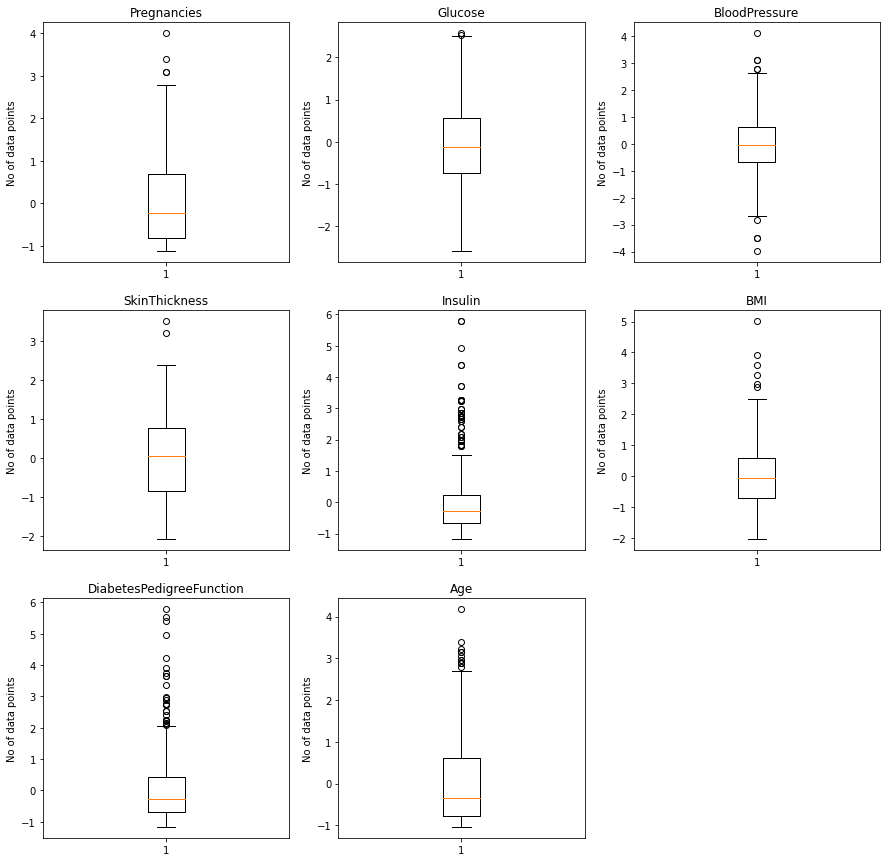

In [599]:
# Train data

fig = plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1
for i in Xtrain.columns:
    plt.subplot(a, b, c)
    plt.boxplot(Xtrain[i])
    plt.title(i)
    plt.ylabel("No of data points")
    c += 1

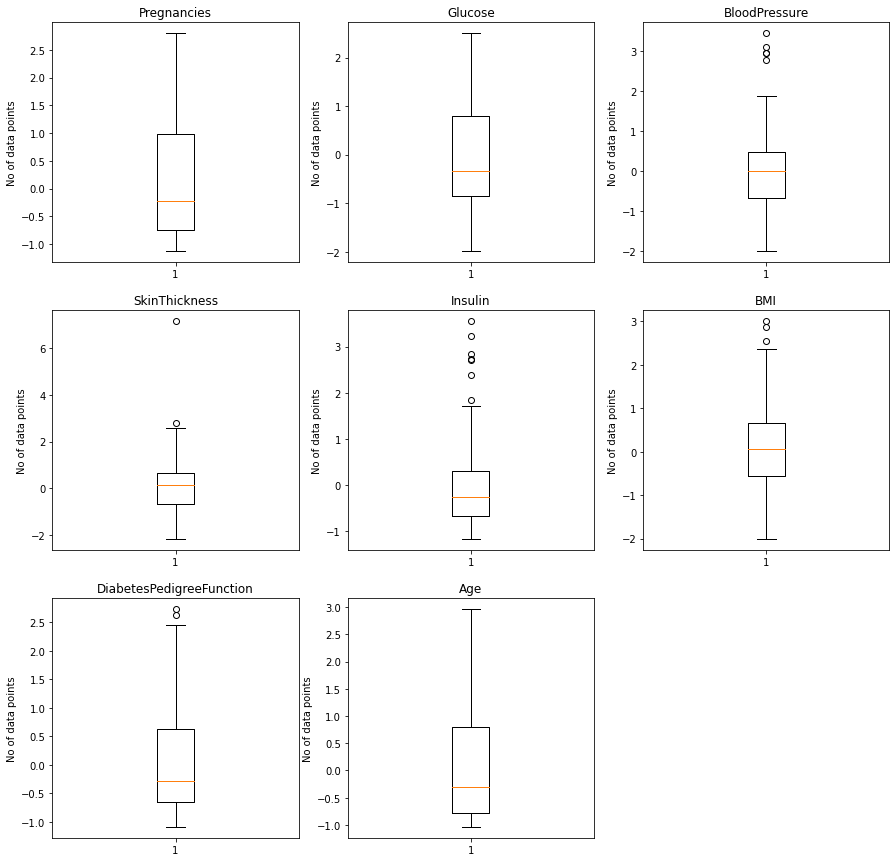

In [600]:
# Test data

fig = plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1
for i in Xtest.columns:
    plt.subplot(a, b, c)
    plt.boxplot(Xtest[i])
    plt.title(i)
    plt.ylabel("No of data points")
    c += 1

#### Handling Outliers

In [601]:
# Lets calculate the interquantile range to calculate the boundaries

for i in Xtrain.columns:
    
    upper_bound = Xtrain[i].mean() + 3*Xtrain[i].std()
    lower_bound = Xtrain[i].mean() - 3*Xtrain[i].std()
    print(upper_bound,lower_bound)
    
    
    Xtrain.loc[Xtrain[i]<=lower_bound,i] = lower_bound
    Xtrain.loc[Xtrain[i]>=upper_bound,i] = upper_bound
    
    Xtest.loc[Xtest[i]<=lower_bound,i] = lower_bound
    Xtest.loc[Xtest[i]>=upper_bound,i] = upper_bound

3.0024459849150977 -3.0024459849150977
3.002445984915097 -3.002445984915097
3.002445984915099 -3.002445984915098
3.0024459849150955 -3.0024459849150955
3.002445984915097 -3.002445984915097
3.002445984915096 -3.002445984915095
3.0024459849150995 -3.0024459849150995
3.0024459849151004 -3.0024459849151004


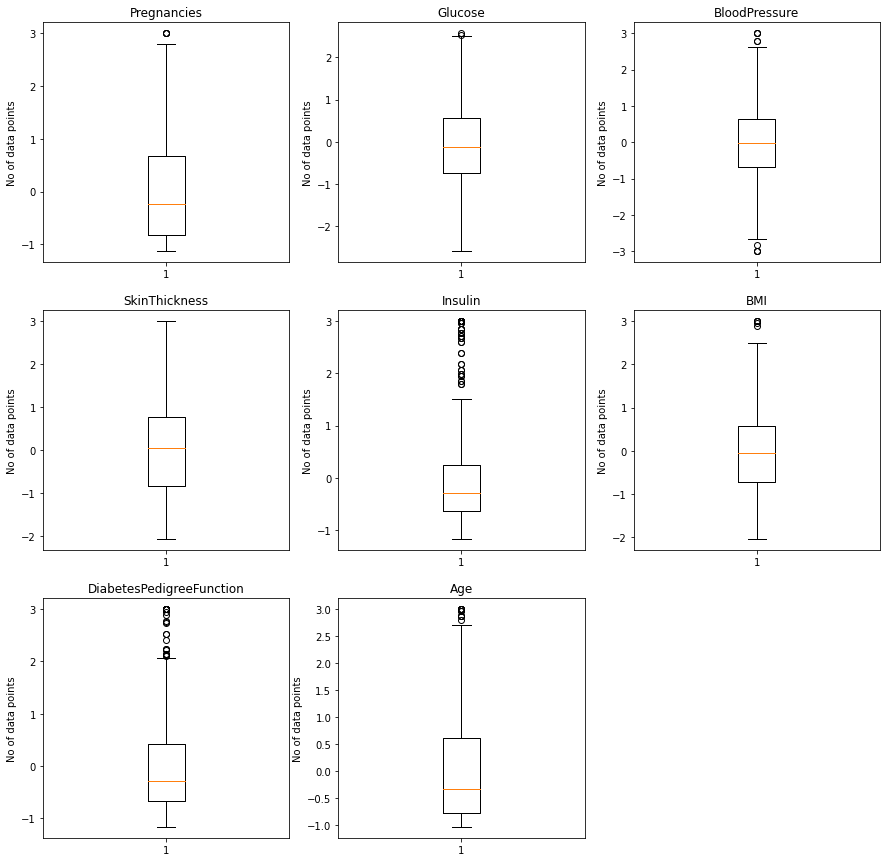

In [602]:
# data after handling outliers

fig = plt.figure(figsize=(15,15))
a = 3
b = 3
c = 1
for i in Xtrain.columns:
    plt.subplot(a, b, c)
    plt.boxplot(Xtrain[i])
    plt.title(i)
    plt.ylabel("No of data points")
    c += 1

### Training various Classification Models

#### Logistic Regression

In [603]:
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression()
logistic.fit(Xtrain,ytrain)

LogisticRegression()

#### KNeighborsClassifier


In [604]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn.fit(Xtrain,ytrain)

KNeighborsClassifier()

#### Naive Bayes

In [605]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(Xtrain,ytrain)

GaussianNB()

#### Decision Tree

In [606]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion="entropy",random_state=0)
decision_tree.fit(Xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

#### Random Forest Classifier

In [607]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
random_forest.fit(Xtrain,ytrain)

RandomForestClassifier(criterion='entropy', random_state=42)

#### Support Vector Machine - kernel(linear)

In [608]:
from sklearn.svm import SVC

svc_linear = SVC(kernel='linear',random_state=42)
svc_linear.fit(Xtrain,ytrain)

SVC(kernel='linear', random_state=42)

#### Support Vector Machine - kernel(rbf)

In [609]:
from sklearn.svm import SVC

svc_rbf = SVC(kernel='rbf',random_state=42)
svc_rbf.fit(Xtrain,ytrain)

SVC(random_state=42)

#### XGBoost

In [610]:
from xgboost import XGBClassifier

xgboost = XGBClassifier()
xgboost.fit(Xtrain,ytrain)

[18:40:10] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Creating list of models

In [611]:
models = [logistic,knn,naive_bayes,decision_tree,random_forest,svc_linear,svc_rbf,xgboost]

#### Evaluating the performance of models 

In [612]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

acc_score = []
for i in models:
    y_pred = i.predict(Xtest)

    print("\n",str(i).center(55,"*"),"\n")
    print("Training Accuracy Score = ",accuracy_score(ytrain,i.predict(Xtrain)))
    print("Testing Accuracy Score = ",accuracy_score(ytest,y_pred))
    print("\nConfusion Metrix\n", confusion_matrix(ytest,y_pred))
    print()
    print("Classification Report".center(55,"-"),"\n\n",classification_report(ytest,y_pred),"\n\n")
    acc_score.append(accuracy_score(ytest,y_pred))


 ******************LogisticRegression()***************** 

Training Accuracy Score =  0.7768729641693811
Testing Accuracy Score =  0.7467532467532467

Confusion Metrix
 [[81 18]
 [21 34]]

-----------------Classification Report----------------- 

               precision    recall  f1-score   support

           0       0.79      0.82      0.81        99
           1       0.65      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154
 



 *****************KNeighborsClassifier()**************** 

Training Accuracy Score =  0.8045602605863192
Testing Accuracy Score =  0.7402597402597403

Confusion Metrix
 [[79 20]
 [20 35]]

-----------------Classification Report----------------- 

               precision    recall  f1-score   support

           0       0.80      0.80      0.80        99
           1       0.64      0.64      0.64        55

    accu

In [613]:
result = pd.DataFrame({"Model":['logistic Regression','knn','naive_bayes','decision_tree','random_forest','svc_linear','svc_rbf','xgboost'],"Accuracy Score":acc_score})
result.sort_values(by = 'Accuracy Score', ascending = False, ignore_index=True)

,Model,Accuracy Score
0,svc_rbf,0.779221
1,random_forest,0.766234
2,svc_linear,0.753247
3,logistic Regression,0.746753
4,knn,0.740260
5,naive_bayes,0.727273
6,xgboost,0.714286
7,decision_tree,0.688312


### StratifiedKFold

In [629]:
from statistics import mean,stdev
from sklearn.model_selection import StratifiedKFold

max_acc = []
min_acc = []
overall_acc = []
def Stratified_fold(models):

    for model in models:
        skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
        accu_stratified = []

        c = 0
        for train_index, test_index in skf.split(Xtrain,ytrain):
        
            x_train_fold, x_test_fold = Xtrain.iloc[train_index], Xtrain.iloc[test_index]
            y_train_fold, y_test_fold = ytrain.iloc[train_index], ytrain.iloc[test_index]
            model.fit(x_train_fold,y_train_fold)
            accu_stratified.append(model.score(x_test_fold,y_test_fold))

        max_acc.append(max(accu_stratified)*100)
        min_acc.append(min(accu_stratified)*100)
        overall_acc.append(mean(accu_stratified)*100)
        
        print("\n\n",model)
        print('\nList of possible accuracy:', accu_stratified)
        print('\nMaximum Accuracy That can be obtained from this model is:',
              max(accu_stratified)*100, '%')
        print('\nMinimum Accuracy:',
              min(accu_stratified)*100, '%')
        print('\nOverall Accuracy:',
              mean(accu_stratified)*100, '%')
        print('\nStandard Deviation is:', stdev(accu_stratified))

In [630]:
Stratified_fold(models)



 LogisticRegression()

List of possible accuracy: [0.7419354838709677, 0.7419354838709677, 0.7419354838709677, 0.7741935483870968, 0.8524590163934426, 0.7868852459016393, 0.7704918032786885, 0.7704918032786885, 0.6885245901639344, 0.7540983606557377]

Maximum Accuracy That can be obtained from this model is: 85.24590163934425 %

Minimum Accuracy: 68.85245901639344 %

Overall Accuracy: 76.22950819672131 %

Standard Deviation is: 0.041850220525474956


 KNeighborsClassifier()

List of possible accuracy: [0.7580645161290323, 0.6774193548387096, 0.7903225806451613, 0.7903225806451613, 0.819672131147541, 0.7868852459016393, 0.6721311475409836, 0.819672131147541, 0.7049180327868853, 0.6885245901639344]

Maximum Accuracy That can be obtained from this model is: 81.9672131147541 %

Minimum Accuracy: 67.21311475409836 %

Overall Accuracy: 75.07932310946589 %

Standard Deviation is: 0.05918203216874907


 GaussianNB()

List of possible accuracy: [0.7419354838709677, 0.7096774193548387, 0.80645

In [632]:
CV_result = pd.DataFrame({"Model":['logistic Regression','knn','naive_bayes','decision_tree','random_forest','svc_linear','svc_rbf','xgboost'],
                          "Max Acc":max_acc,"Min Acc":min_acc,"OverAll Acc":overall_acc})
CV_result.sort_values(by = 'OverAll Acc', ascending = False, ignore_index=True)

,Model,Max Acc,Min Acc,OverAll Acc
0,logistic Regression,85.245902,68.852459,76.229508
1,random_forest,81.967213,62.903226,75.748281
2,svc_linear,85.245902,68.852459,75.745637
3,knn,81.967213,67.213115,75.079323
4,naive_bayes,80.645161,70.491803,74.912745
5,svc_rbf,80.327869,65.573770,74.600740
6,xgboost,82.258065,64.516129,74.436806
7,decision_tree,75.409836,58.064516,68.894765


### Conclusion

Logistic Regression is the winner of all